## Installing the required packages

In [1]:
install.packages("dplyr")
install.packages("ggplot2")

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


## Load the required libraries

In [2]:
library(dplyr)
library(ggplot2)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



## Reading the data

In [3]:
data <- read.csv("June 10-July 12, 2015 - Gaming, Jobs and Broadband - CSV.csv", header = TRUE, sep = ",")

## Ques 1> How social media is used for searching and applying for a job by male/female?

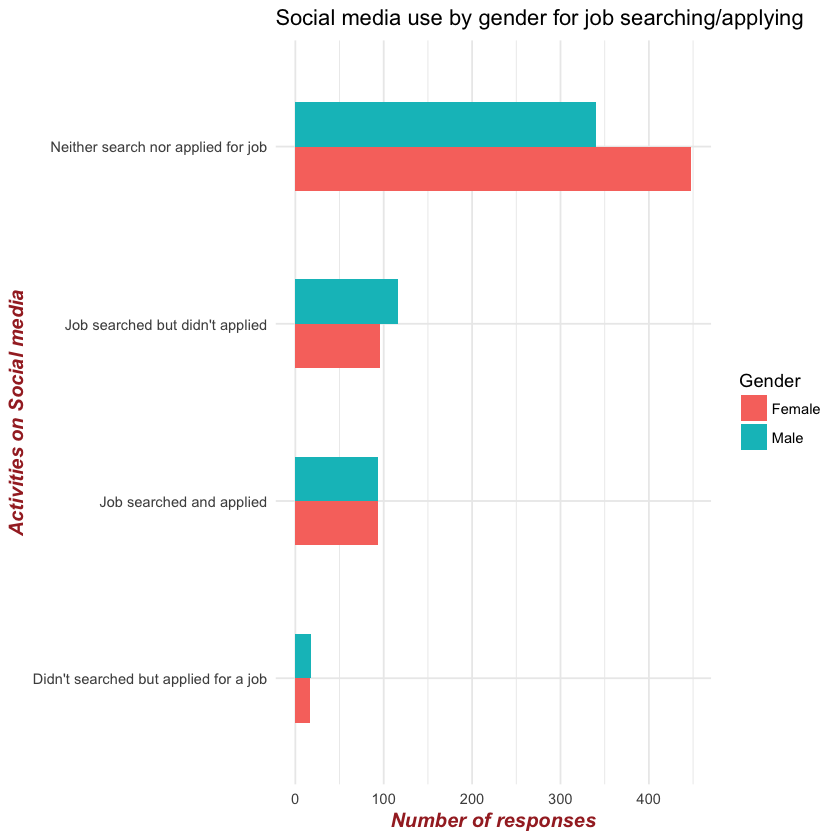

In [4]:
social_media_data <- select(data, sex, snsjob1a, snsjob1b)
social_media_data <- na.omit(social_media_data)
social_media_data <- filter(social_media_data, snsjob1a == 1 | snsjob1a == 2 | snsjob1b == 1 | snsjob1b == 2)

social_media_data_male <- filter(social_media_data, sex == 1)
social_media_data_male <- group_by(social_media_data_male, snsjob1a, snsjob1b)
social_media_data_male <- summarise(social_media_data_male, count = n())

social_media_data_male$Questions <- c("Job searched and applied", "Job searched but didn't applied", "Didn't searched but applied for a job", "Neither search nor applied for job")
social_media_data_male$Gender <- "Male"


social_media_data_female <- filter(social_media_data, sex == 2)
social_media_data_female <- group_by(social_media_data_female, snsjob1a, snsjob1b)
social_media_data_female <- summarise(social_media_data_female, count = n())

social_media_data_female$Questions <- c("Job searched and applied", "Job searched but didn't applied","Didn't searched but applied for a job", "Neither search nor applied for job")

social_media_data_female$Gender <- "Female"

social_media <- rbind(social_media_data_male, social_media_data_female)

p <- ggplot(data = social_media, aes(x = Questions, y = count, fill=Gender, width=.5)) + labs(title="Social media use by gender for job searching/applying", x="Activities on Social media", y = "Number of responses")
p + geom_bar(stat="identity", position=position_dodge()) + theme_minimal() +theme(axis.title=element_text(face="bold.italic", size="12", color="brown"), legend.position="right") + coord_flip()


The number of females who have neither searched nor applied for job found in social media is greater than number of males.

The number of people who haven't searched or applied for a job is higher than the number of people who have both searched and applied for a job found in social media.

The number of males and females is same when job searched and applied on social media is considered. 

### Visualizing the use of social media for searching, applying and letting friends know about a job by gender

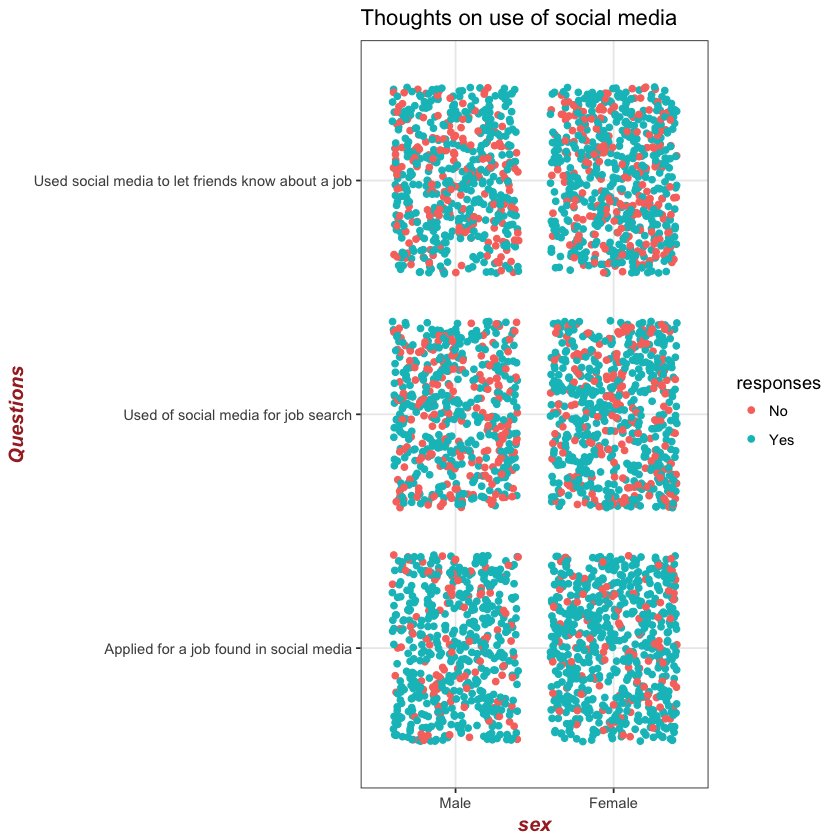

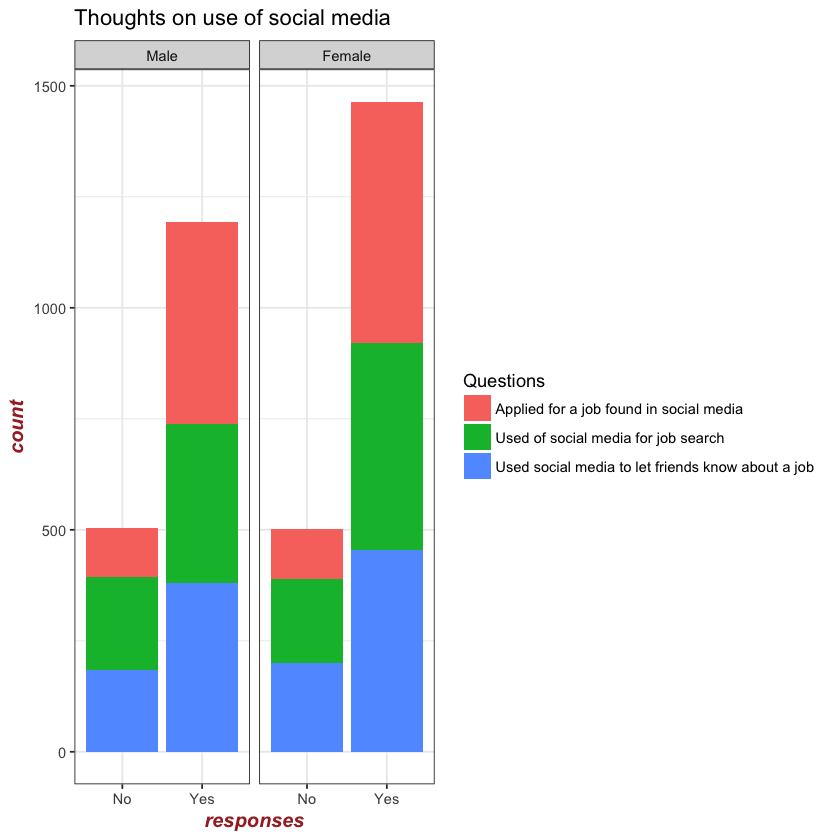

In [5]:
res_data <-  within(data, sex <- factor(sex, labels = c("Male", "Female")))

res_data1 <- na.omit(select(res_data, sex, snsjob1a))
res_data1$Questions <- 'Used of social media for job search'    #'a'
colnames(res_data1) <- c('sex', 'responses','Questions')

res_data2 <- na.omit(select(res_data, sex, snsjob1b))
res_data2$Questions <- 'Applied for a job found in social media' #'b'
colnames(res_data2) <- c('sex', 'responses','Questions')

res_data3 <- na.omit(select(res_data, sex, snsjob1c))
res_data3$Questions <- 'Used social media to let friends know about a job'  #'c'
colnames(res_data3) <- c('sex', 'responses','Questions')

snsjob_1 <- rbind(res_data1, res_data2, res_data3)
snsjob_1 <- na.omit(snsjob_1)

snsjob_1 <- snsjob_1[!snsjob_1$responses == 8, ]
snsjob_1 <- snsjob_1[!snsjob_1$responses == 9, ]
snsjob_1 <- within(snsjob_1, responses <- factor(responses, labels = c("No", "Yes")))

res_data_snsjob <- within(snsjob_1, Questions <- factor(Questions))

#Visualization
qplot(sex, Questions, colour = responses, data = res_data_snsjob, geom = "jitter", main = "Thoughts on use of social media") + theme_bw() + theme(axis.title=element_text(face="bold.italic", size="12", color="brown"), legend.position="right")
qplot(responses, data=res_data_snsjob, geom="bar", facets = . ~sex, fill = Questions, main = "Thoughts on use of social media") + theme_bw() + theme(axis.title=element_text(face="bold.italic", size="12", color="brown"), legend.position="right") 

## Ques 2> How is smartphone used for different activities by male/female?

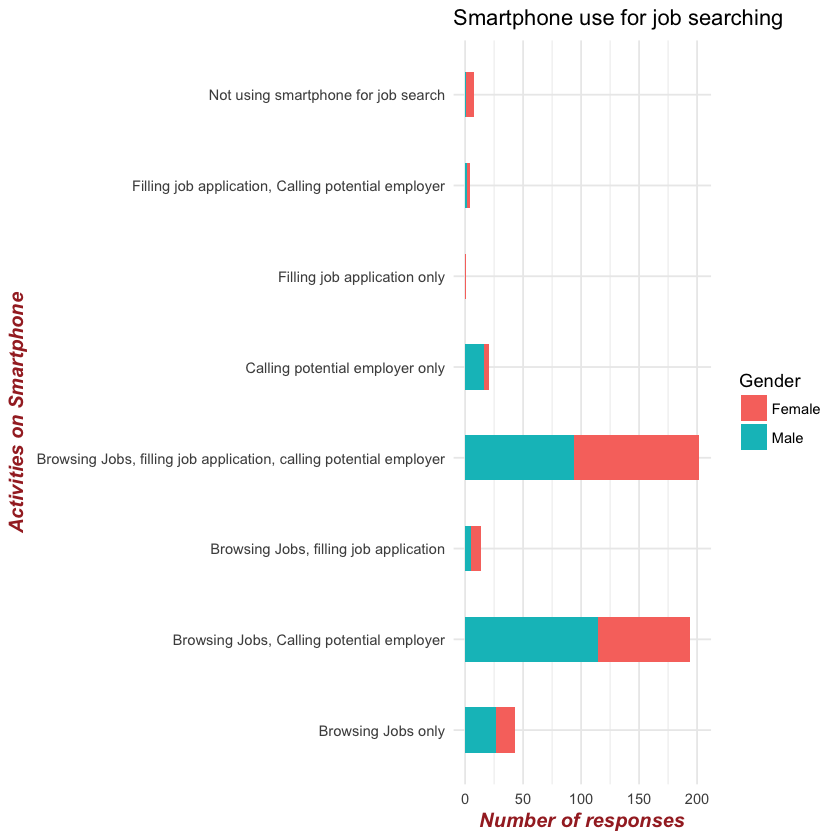

In [6]:
#Ques> Analysis on Smartphone usage
smartphone_data <- select(data, sex, smjob1,smjob2a, smjob2c, smjob2e)
smartphone_data <- na.omit(smartphone_data)

smartphone_data <- group_by(smartphone_data, sex, smjob2a, smjob2c, smjob2e)
smartphone_data <- summarise(smartphone_data, count = n())

smartphone_data_male <- filter(smartphone_data, sex == 1)

smartphone_data_male$Questions <- c("Browsing Jobs, filling job application, calling potential employer", 
                               "Browsing Jobs, filling job application",
                               "Browsing Jobs, Calling potential employer",
                               "Browsing Jobs only",
                               "Filling job application, Calling potential employer",
                               "Calling potential employer only",
                               "Not using smartphone for job search")

smartphone_data_male$sex[smartphone_data_male$sex == 1] <- "Male"

smartphone_data_female <- filter(smartphone_data, sex == 2)

smartphone_data_female$Questions <- c("Browsing Jobs, filling job application, calling potential employer", 
                                    "Browsing Jobs, filling job application",
                                    "Browsing Jobs, Calling potential employer",
                                    "Browsing Jobs only",
                                    "Filling job application, Calling potential employer",
                                    "Filling job application only",
                                    "Calling potential employer only",
                                    "Not using smartphone for job search")


smartphone_data_female$sex[smartphone_data_female$sex == 2] <- "Female"

smartphone_data <- rbind(smartphone_data_male, smartphone_data_female)
colnames(smartphone_data)[1] <- "Gender"
#smartphone_data

p <- ggplot(data = smartphone_data, aes(x = Questions, y = count, fill=Gender, width=.5)) + labs(title="Smartphone use for job searching", x="Activities on Smartphone", y = "Number of responses")
p + geom_bar(stat="identity") + theme_minimal() + theme(axis.title=element_text(face="bold.italic", size="12", color="brown"), legend.position="right") + coord_flip()

There are very less people who uses smartphones for filling job application only. 

Major activity recorded using smartphone is browsing jobs, filling job application and calling potential employer for job.

Browsing jobs and calling potential employer using smartphones is preferred more amongst males as compare to females.

## Ques 3> How people thinks about someone who doesn't have high speed internet connection at their home with respect to getting health information and keeping up with the news and information?

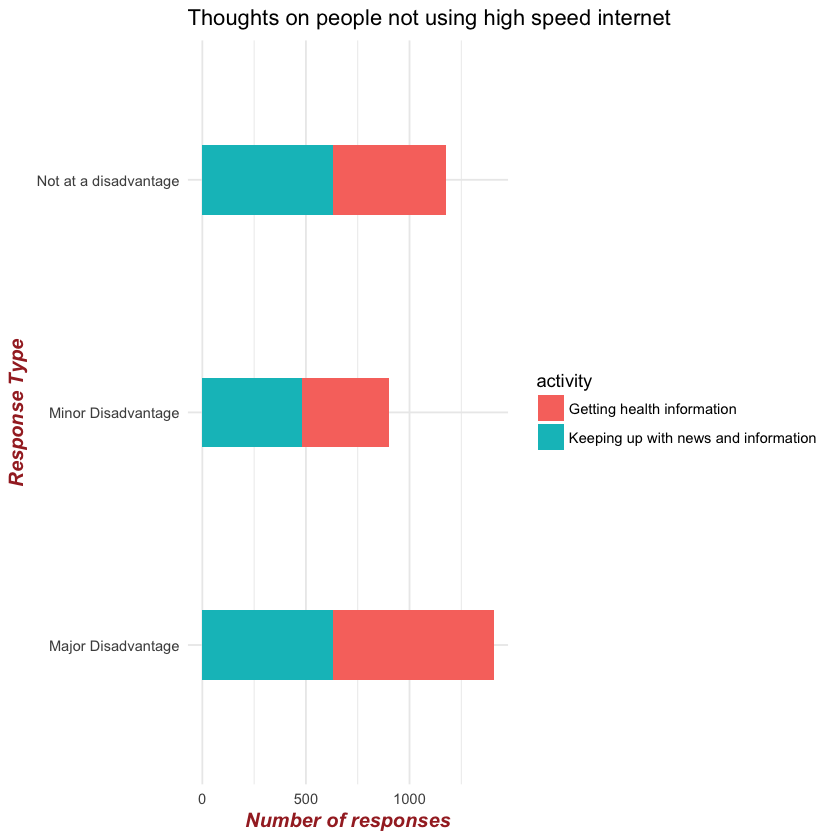

In [7]:
#Ques> Broadband usage information
bbhome_usage <- select(data, sex, bbhome3a, bbhome3c:bbhome3e)

bbhome_usage <- bbhome_usage[!bbhome_usage$bbhome3a == 8, ]
bbhome_usage <- bbhome_usage[!bbhome_usage$bbhome3a == 9, ]

bbhome_usage <- bbhome_usage[!bbhome_usage$bbhome3c == 8, ]
bbhome_usage <- bbhome_usage[!bbhome_usage$bbhome3c == 9, ]

bbhome_usage <- bbhome_usage[!bbhome_usage$bbhome3d == 8, ]
bbhome_usage <- bbhome_usage[!bbhome_usage$bbhome3d == 9, ]

bbhome_usage <- bbhome_usage[!bbhome_usage$bbhome3e == 8, ]
bbhome_usage <- bbhome_usage[!bbhome_usage$bbhome3e == 9, ]

bbhome_usage <- group_by(bbhome_usage, bbhome3a, bbhome3d)
bbhome_usage <- summarise(bbhome_usage, count = n())

bbhome_usage_a <- select(bbhome_usage, bbhome3a, count)
bbhome_usage_a <- group_by(bbhome_usage_a, bbhome3a)
bbhome_usage_a <- summarise(bbhome_usage_a, count = sum(count))
bbhome_usage_a <- within(bbhome_usage_a, bbhome3a <- factor(bbhome3a, labels = c("Major Disadvantage", 
                                                                                 "Minor Disadvantage", 
                                                                                 "Not at a disadvantage")))
bbhome_usage_a$activity <- "Keeping up with news and information"
colnames(bbhome_usage_a)[1] <- "Response_Category"


bbhome_usage_d <- ungroup(bbhome_usage)
bbhome_usage_d <- select(bbhome_usage_d, bbhome3d, count)
bbhome_usage_d <- group_by(bbhome_usage_d, bbhome3d)
bbhome_usage_d <- summarise(bbhome_usage_d, count = sum(count))
bbhome_usage_d <- within(bbhome_usage_d, bbhome3d <- factor(bbhome3d, labels = c("Major Disadvantage", 
                                                                                 "Minor Disadvantage", 
                                                                                 "Not at a disadvantage")))
bbhome_usage_d$activity <- "Getting health information"
colnames(bbhome_usage_d)[1] <- "Response_Category"

activity_result <- rbind(bbhome_usage_a, bbhome_usage_d)
#activity_result

p <- ggplot(data = activity_result, aes(x = Response_Category, y = count, fill= activity, width=.3)) + labs(title="Thoughts on people not using high speed internet", x="Response Type", y = "Number of responses")
p + geom_bar(stat="identity") + theme_minimal() + theme(axis.title=element_text(face="bold.italic", size="12", color="brown"), legend.position="right") + coord_flip()

The number of people thinks that keeping up with the news and information is not a disadvantage even if someone doesn't have high speed internet at home while on the other hand they think that getting health information is a disadvantage to people with absence of high speed internet.

## Ques 4> How people thinks about someone who doesn't have high speed internet connection at their home with respect to different activities that requires the connection?

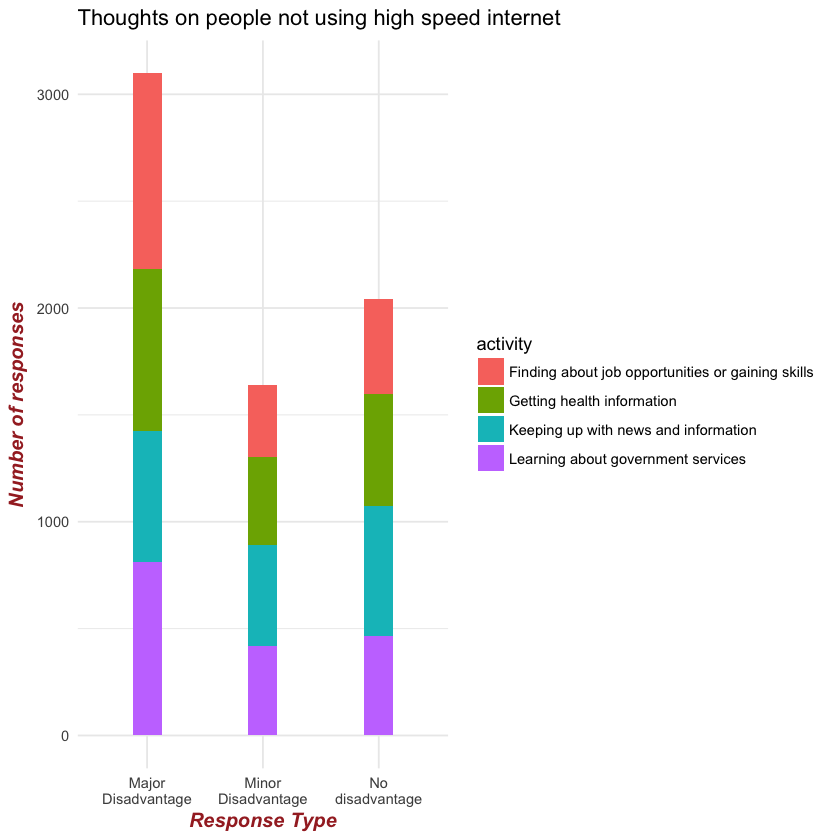

In [8]:
bbhome_usage <- select(data, sex, bbhome3a:bbhome3e)

bbhome_usage <- bbhome_usage[bbhome_usage$bbhome3a != 8 & bbhome_usage$bbhome3a != 9, ]
bbhome_usage <- bbhome_usage[bbhome_usage$bbhome3b != 8 & bbhome_usage$bbhome3b != 9, ]
bbhome_usage <- bbhome_usage[bbhome_usage$bbhome3c != 8 & bbhome_usage$bbhome3c != 9, ]
bbhome_usage <- bbhome_usage[bbhome_usage$bbhome3d != 8 & bbhome_usage$bbhome3d != 9, ]
bbhome_usage <- bbhome_usage[bbhome_usage$bbhome3e != 8 & bbhome_usage$bbhome3e != 9, ]

bbhome_usage <- group_by(bbhome_usage, bbhome3a, bbhome3b, bbhome3c, bbhome3d)
bbhome_usage <- summarise(bbhome_usage, count = n())

bbhome_usage <- ungroup(bbhome_usage)
bbhome_usage_a <- select(bbhome_usage, bbhome3a, count)
bbhome_usage_a <- group_by(bbhome_usage_a, bbhome3a)
bbhome_usage_a <- summarise(bbhome_usage_a, count = sum(count))
bbhome_usage_a <- within(bbhome_usage_a, bbhome3a <- factor(bbhome3a, labels = c("Major Disadvantage", 
                                                                                 "Minor Disadvantage", 
                                                                                 "No disadvantage")))
bbhome_usage_a$activity <- "Keeping up with news and information"
colnames(bbhome_usage_a)[1] <- "Response_Category"


bbhome_usage_b <- ungroup(bbhome_usage)
bbhome_usage_b <- select(bbhome_usage_b, bbhome3b, count)
bbhome_usage_b <- group_by(bbhome_usage_b, bbhome3b)
bbhome_usage_b <- summarise(bbhome_usage_b, count = sum(count))
bbhome_usage_b <- within(bbhome_usage_b, bbhome3b <- factor(bbhome3b, labels = c("Major Disadvantage", 
                                                                                 "Minor Disadvantage", 
                                                                                 "No disadvantage")))
bbhome_usage_b$activity <- "Finding about job opportunities or gaining skills"
colnames(bbhome_usage_b)[1] <- "Response_Category"


bbhome_usage_c <- ungroup(bbhome_usage)
bbhome_usage_c <- select(bbhome_usage_c, bbhome3c, count)
bbhome_usage_c <- group_by(bbhome_usage_c, bbhome3c)
bbhome_usage_c <- summarise(bbhome_usage_c, count = sum(count))
bbhome_usage_c <- within(bbhome_usage_c, bbhome3c <- factor(bbhome3c, labels = c("Major Disadvantage", 
                                                                                 "Minor Disadvantage", 
                                                                                 "No disadvantage")))
bbhome_usage_c$activity <- "Learning about government services"
colnames(bbhome_usage_c)[1] <- "Response_Category"


bbhome_usage_d <- ungroup(bbhome_usage)
bbhome_usage_d <- select(bbhome_usage_d, bbhome3d, count)
bbhome_usage_d <- group_by(bbhome_usage_d, bbhome3d)
bbhome_usage_d <- summarise(bbhome_usage_d, count = sum(count))
bbhome_usage_d <- within(bbhome_usage_d, bbhome3d <- factor(bbhome3d, labels = c("Major Disadvantage", 
                                                                                 "Minor Disadvantage", 
                                                                                 "No disadvantage")))
bbhome_usage_d$activity <- "Getting health information"
colnames(bbhome_usage_d)[1] <- "Response_Category"

activity_result <- rbind(bbhome_usage_a, bbhome_usage_b, bbhome_usage_c, bbhome_usage_d)

levels(activity_result$Response_Category) <- gsub(" ", "\n", levels(activity_result$Response_Category))

p <- ggplot(data = activity_result, aes(x = Response_Category, y = count, fill= activity, width=.25)) + labs(title="Thoughts on people not using high speed internet", x="Response Type", y = "Number of responses")
p + geom_bar(stat="identity") + theme_minimal() + theme(axis.title=element_text(face="bold.italic", size="12", color="brown"), legend.position="right")

People think that major disadvantage of not having high speed internet at home is learning about government services, getting health information and finding about job opportunities or gaining skills.

People think that minor or no disadvantage of not having high speed internet at home is keeping up with news information. 

## Ques 5> How much people are concerned with different reasons for loosing current Job?

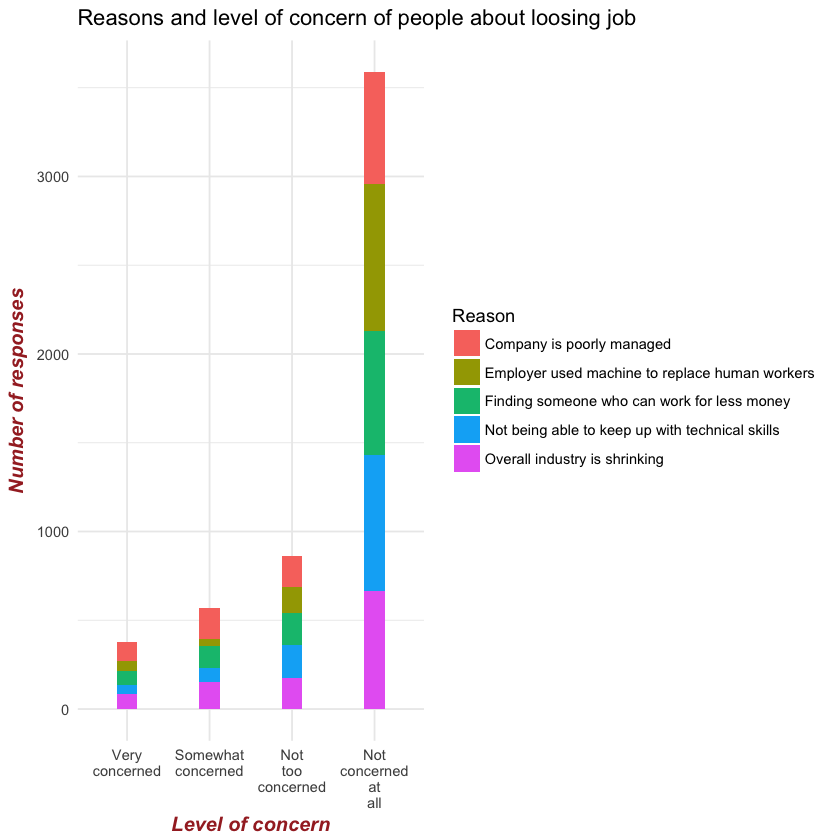

In [9]:
job_loose_reason_data <- select(data, auto1a:auto1e)
job_loose_reason_data <- na.omit(job_loose_reason_data)
job_loose_reason_data <- job_loose_reason_data[job_loose_reason_data$auto1a != 8 & job_loose_reason_data$auto1a != 9, ]
job_loose_reason_data <- job_loose_reason_data[job_loose_reason_data$auto1b != 8 & job_loose_reason_data$auto1b != 9, ]
job_loose_reason_data <- job_loose_reason_data[job_loose_reason_data$auto1c != 8 & job_loose_reason_data$auto1c != 9, ]
job_loose_reason_data <- job_loose_reason_data[job_loose_reason_data$auto1d != 8 & job_loose_reason_data$auto1d != 9, ]
job_loose_reason_data <- job_loose_reason_data[job_loose_reason_data$auto1e != 8 & job_loose_reason_data$auto1e != 9, ]

job_loose_reason_data <- group_by(job_loose_reason_data, auto1a, auto1b, auto1c, auto1d, auto1e)
job_loose_reason_data <- summarise(job_loose_reason_data, count = n())

job_loose_reason_data_a <- ungroup(job_loose_reason_data)
job_loose_reason_data_a <- select(job_loose_reason_data_a, auto1a, count)
job_loose_reason_data_a <- group_by(job_loose_reason_data_a, auto1a)
job_loose_reason_data_a <- summarise(job_loose_reason_data_a, count = sum(count))
job_loose_reason_data_a <- within(job_loose_reason_data_a, auto1a <- factor(auto1a, labels = c("Very concerned", 
                                                                                 "Somewhat concerned", 
                                                                                 "Not too concerned", 
                                                                                 "Not concerned at all")))
job_loose_reason_data_a$Reason <- "Finding someone who can work for less money"

colnames(job_loose_reason_data_a)[1] <- "Response_Category"


job_loose_reason_data_b <- ungroup(job_loose_reason_data)
job_loose_reason_data_b <- select(job_loose_reason_data_b, auto1b, count)
job_loose_reason_data_b <- group_by(job_loose_reason_data_b, auto1b)
job_loose_reason_data_b <- summarise(job_loose_reason_data_b, count = sum(count))
job_loose_reason_data_b <- within(job_loose_reason_data_b, auto1b <- factor(auto1b, labels = c("Very concerned", 
                                                                                               "Somewhat concerned", 
                                                                                               "Not too concerned", 
                                                                                               "Not concerned at all")))
job_loose_reason_data_b$Reason <- "Not being able to keep up with technical skills"

colnames(job_loose_reason_data_b)[1] <- "Response_Category"


job_loose_reason_data_c <- ungroup(job_loose_reason_data)
job_loose_reason_data_c <- select(job_loose_reason_data_c, auto1c, count)
job_loose_reason_data_c <- group_by(job_loose_reason_data_c, auto1c)
job_loose_reason_data_c <- summarise(job_loose_reason_data_c, count = sum(count))
job_loose_reason_data_c <- within(job_loose_reason_data_c, auto1c <- factor(auto1c, labels = c("Very concerned", 
                                                                                               "Somewhat concerned", 
                                                                                               "Not too concerned", 
                                                                                               "Not concerned at all")))
job_loose_reason_data_c$Reason <- "Employer used machine to replace human workers"

colnames(job_loose_reason_data_c)[1] <- "Response_Category"


job_loose_reason_data_d <- ungroup(job_loose_reason_data)
job_loose_reason_data_d <- select(job_loose_reason_data_d, auto1d, count)
job_loose_reason_data_d <- group_by(job_loose_reason_data_d, auto1d)
job_loose_reason_data_d <- summarise(job_loose_reason_data_d, count = sum(count))
job_loose_reason_data_d <- within(job_loose_reason_data_d, auto1d <- factor(auto1d, labels = c("Very concerned", 
                                                                                               "Somewhat concerned", 
                                                                                               "Not too concerned", 
                                                                                               "Not concerned at all")))
job_loose_reason_data_d$Reason <- "Overall industry is shrinking"

colnames(job_loose_reason_data_d)[1] <- "Response_Category"


job_loose_reason_data_e <- ungroup(job_loose_reason_data)
job_loose_reason_data_e <- select(job_loose_reason_data_e, auto1e, count)
job_loose_reason_data_e <- group_by(job_loose_reason_data_e, auto1e)
job_loose_reason_data_e <- summarise(job_loose_reason_data_e, count = sum(count))
job_loose_reason_data_e <- within(job_loose_reason_data_e, auto1e <- factor(auto1e, labels = c("Very concerned", 
                                                                                               "Somewhat concerned", 
                                                                                               "Not too concerned", 
                                                                                               "Not concerned at all")))
job_loose_reason_data_e$Reason <- "Company is poorly managed"

colnames(job_loose_reason_data_e)[1] <- "Response_Category"


bbhome_activity_result <- rbind(job_loose_reason_data_a, job_loose_reason_data_b, job_loose_reason_data_c, 
                                job_loose_reason_data_d, job_loose_reason_data_e)


levels(bbhome_activity_result$Response_Category) <- gsub(" ", "\n", levels(bbhome_activity_result$Response_Category))

p <- ggplot(data = bbhome_activity_result, aes(x = Response_Category, y = count, fill= Reason, width=.25)) + labs(title="Reasons and level of concern of people about loosing job ", x="Level of concern", y = "Number of responses")
p + geom_bar(stat="identity") + theme_minimal() + theme(axis.title=element_text(face="bold.italic", size="12", color="brown"), legend.position="right")


In general, majority people are not concerned about loosing their job with respect to different reasons specified in the survey.

Amongst the most concerning level the major reason of loosing a job is because the company is poorly managed.

People are somewhat concerned about loosing a job because their company is poorly managaed and the overall industry is shrinking.

## Ques 6> What are the major reasons for not having a cable/satellite subscription at home?

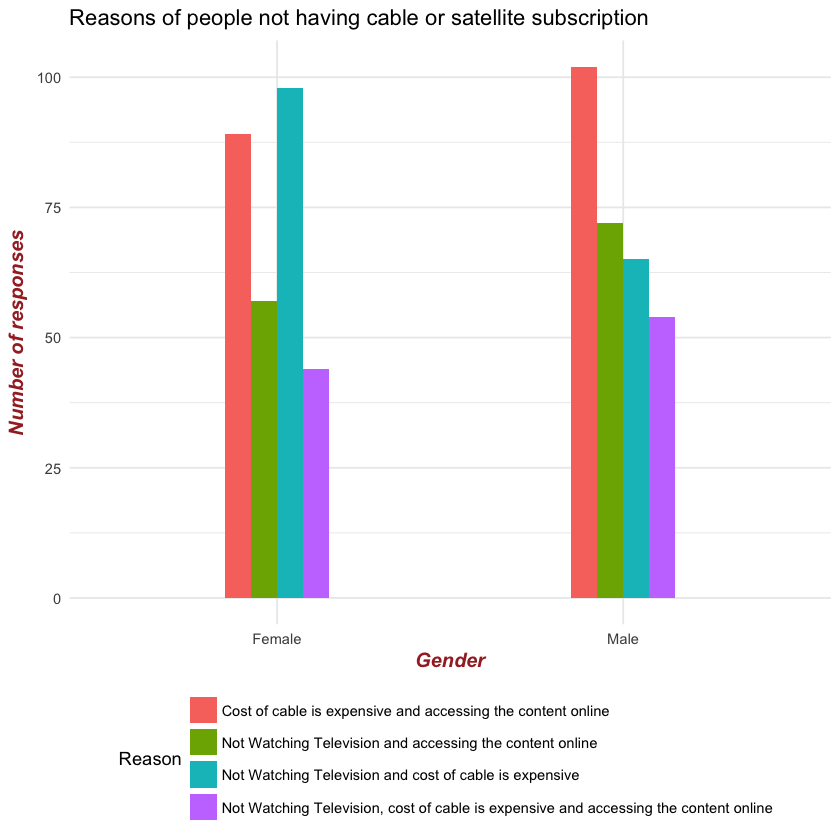

In [10]:
cable_satellite <- select(data, sex, cable3a:cable3c)
cable_satellite <- na.omit(cable_satellite)

cable_satellite <- cable_satellite[cable_satellite$cable3a != 8 & cable_satellite$cable3a != 9, ]
cable_satellite <- cable_satellite[cable_satellite$cable3b != 8 & cable_satellite$cable3b != 9, ]
cable_satellite <- cable_satellite[cable_satellite$cable3c != 8 & cable_satellite$cable3c != 9, ]

cable_satellite_male <- filter(cable_satellite, sex == 1)
cable_satellite_male <- group_by(cable_satellite_male, cable3a, cable3b, cable3c)
cable_satellite_male <- summarise(cable_satellite_male, count = n())

cable_satellite_male_a_b <- ungroup(cable_satellite_male)
cable_satellite_male_a_b <- select(cable_satellite_male_a_b, cable3a, cable3b, count)
cable_satellite_male_a_b <- group_by(cable_satellite_male_a_b, cable3a, cable3b)
cable_satellite_male_a_b <- summarise(cable_satellite_male_a_b, count = sum(count))
cable_satellite_male_a_b$Reason <- "Not Watching Television and cost of cable is expensive"

cable_satellite_male_b_c <- ungroup(cable_satellite_male)
cable_satellite_male_b_c <- select(cable_satellite_male_b_c, cable3b, cable3c, count)
cable_satellite_male_b_c <- group_by(cable_satellite_male_b_c, cable3b, cable3c)
cable_satellite_male_b_c <- summarise(cable_satellite_male_b_c, count = sum(count))
cable_satellite_male_b_c$Reason <- "Cost of cable is expensive and accessing the content online"

cable_satellite_male_a_c <- ungroup(cable_satellite_male)
cable_satellite_male_a_c <- select(cable_satellite_male_a_c, cable3a, cable3c, count)
cable_satellite_male_a_c <- group_by(cable_satellite_male_a_c, cable3a, cable3c)
cable_satellite_male_a_c <- summarise(cable_satellite_male_a_c, count = sum(count))
cable_satellite_male_a_c$Reason <- "Not Watching Television and accessing the content online"

cable_satellite_male_a_b_c <- ungroup(cable_satellite_male)
cable_satellite_male_a_b_c <- select(cable_satellite_male_a_b_c, cable3a, cable3b, cable3c, count)
cable_satellite_male_a_b_c <- group_by(cable_satellite_male_a_b_c, cable3a, cable3b, cable3c)
cable_satellite_male_a_b_c <- summarise(cable_satellite_male_a_b_c, count = sum(count))
cable_satellite_male_a_b_c$Reason <- "Not Watching Television, cost of cable is expensive and accessing the content online"

cable_sat_sum_male <-  rbind(head(select(ungroup(cable_satellite_male_a_b), count, Reason), 1),
                             head(select(ungroup(cable_satellite_male_b_c), count, Reason), 1),
                             head(select(ungroup(cable_satellite_male_a_c), count, Reason), 1),
                             head(select(ungroup(cable_satellite_male_a_b_c), count, Reason), 1))

cable_sat_sum_male$Gender <- "Male"


cable_satellite_female <- filter(cable_satellite, sex == 2)
cable_satellite_female <- group_by(cable_satellite_female, cable3a, cable3b, cable3c)
cable_satellite_female <- summarise(cable_satellite_female, count = n())

cable_satellite_female_a_b <- ungroup(cable_satellite_female)
cable_satellite_female_a_b <- select(cable_satellite_female_a_b, cable3a, cable3b, count)
cable_satellite_female_a_b <- group_by(cable_satellite_female_a_b, cable3a, cable3b)
cable_satellite_female_a_b <- summarise(cable_satellite_male_a_b, count = sum(count))
cable_satellite_female_a_b$Reason <- "Not Watching Television and cost of cable is expensive"

cable_satellite_female_b_c <- ungroup(cable_satellite_female)
cable_satellite_female_b_c <- select(cable_satellite_female_b_c, cable3b, cable3c, count)
cable_satellite_female_b_c <- group_by(cable_satellite_female_b_c, cable3b, cable3c)
cable_satellite_female_b_c <- summarise(cable_satellite_female_b_c, count = sum(count))
cable_satellite_female_b_c$Reason <- "Cost of cable is expensive and accessing the content online"

cable_satellite_female_a_c <- ungroup(cable_satellite_female)
cable_satellite_female_a_c <- select(cable_satellite_female_a_c, cable3a, cable3c, count)
cable_satellite_female_a_c <- group_by(cable_satellite_female_a_c, cable3a, cable3c)
cable_satellite_female_a_c <- summarise(cable_satellite_female_a_c, count = sum(count))
cable_satellite_female_a_c$Reason <- "Not Watching Television and accessing the content online"

cable_satellite_female_a_b_c <- ungroup(cable_satellite_female)
cable_satellite_female_a_b_c <- select(cable_satellite_female_a_b_c, cable3a, cable3b, cable3c, count)
cable_satellite_female_a_b_c <- group_by(cable_satellite_female_a_b_c, cable3a, cable3b, cable3c)
cable_satellite_female_a_b_c <- summarise(cable_satellite_female_a_b_c, count = sum(count))
cable_satellite_female_a_b_c$Reason <- "Not Watching Television, cost of cable is expensive and accessing the content online"

cable_sat_sum_female <-  rbind(head(select(ungroup(cable_satellite_female_a_b), count, Reason), 1),
                             head(select(ungroup(cable_satellite_female_b_c), count, Reason), 1),
                             head(select(ungroup(cable_satellite_female_a_c), count, Reason), 1),
                             head(select(ungroup(cable_satellite_female_a_b_c), count, Reason), 1))

cable_sat_sum_female$Gender <- "Female"


cable_sat_sum <- rbind(cable_sat_sum_male, cable_sat_sum_female)

p <- ggplot(data = cable_sat_sum, aes(x = Gender, y = count, fill = Reason, width=0.3)) + labs(title="Reasons of people not having cable or satellite subscription", x="Gender", y = "Number of responses")
p + geom_bar(stat="identity", position=position_dodge()) + theme_minimal() + theme(axis.title=element_text(face="bold.italic", size="12", color="brown"), legend.position="bottom") + guides(fill=guide_legend(nrow=4,byrow=TRUE))


The major reason across the two genders of not having cable or satellite subscription is expensive cost of cable and the alternate ways to access the content online.

More males have cited the reason as not watching television and accessing the content online as compare to females.

More Females have cited the reason as not watching television and expensive cable cost as compare to females.

## Reference::

1. Pew Research Center. http://www.pewresearch.org/, last viewed 2017. 

2. Pew Research Center Datasets, http://www.pewinternet.org/datasets/, last viewed 2017.